In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.image as mimg 
import tensorflow as tf
from tensorflow import keras
import cv2 
import PIL
from PIL import Image 

from sklearn.model_selection import train_test_split
import os



In [2]:
with_mask_file = os.listdir("/kaggle/input/face-mask-dataset/data/with_mask")
without_mask_file = os.listdir("/kaggle/input/face-mask-dataset/data/without_mask")

In [3]:
len(with_mask_file), len(without_mask_file)

(3725, 3828)

In [4]:
with_mask_labels = [1] * len(with_mask_file)
wihtout_mask_lables = [0] * len(without_mask_file)

In [5]:
with_mask_labels[0:5], wihtout_mask_lables[0:5]

([1, 1, 1, 1, 1], [0, 0, 0, 0, 0])

In [6]:
labels = with_mask_labels + wihtout_mask_lables

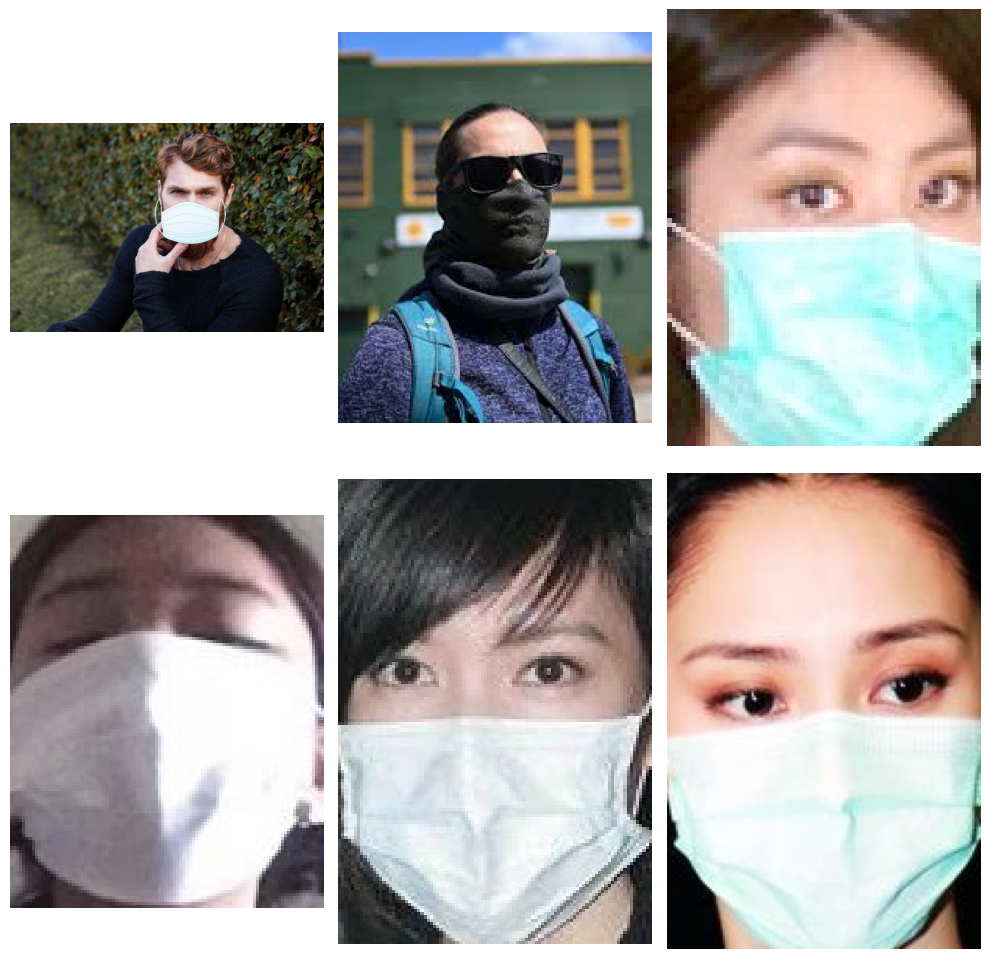

In [7]:
plt.figure(figsize=(10, 10)) 

rows = 2
cols = 3

for i in range(1, 6+1): 
    img = mimg.imread(f'/kaggle/input/face-mask-dataset/data/with_mask/with_mask_{i}.jpg')
    plt.subplot(rows, cols, i)  
    plt.imshow(img)
    plt.axis('off') 

plt.tight_layout()
plt.show()


In [8]:
with_mask_path = '/kaggle/input/face-mask-dataset/data/with_mask/'

data = []

for img_file in with_mask_file:
    image = Image.open(with_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [9]:
without_mask_path = '/kaggle/input/face-mask-dataset/data/without_mask/'

for img in without_mask_file:
    image = Image.open(without_mask_path + img)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

In [10]:
X=np.array(data)
Y=np.array(labels)

In [11]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [12]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

In [13]:
x_train_scl=x_train/255
x_test_scl=x_test/255

In [14]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.50))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.50))

model.add(keras.layers.Dense(2,activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
Model=model.fit(x_train_scl,y_train,validation_split=0.1,epochs=10)

Epoch 1/10


I0000 00:00:1726699674.741017      70 service.cc:145] XLA service 0x7d080c004450 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726699674.741068      70 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  9/192 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.5637 - loss: 0.9903

I0000 00:00:1726699680.606274      70 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7730 - loss: 0.5225

I0000 00:00:1726699687.487015      69 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_1', 64 bytes spill stores, 64 bytes spill loads



192/192 ━━━━━━━━━━━━━━━━━━━━ 16s 46ms/step - accuracy: 0.7733 - loss: 0.5219 - val_accuracy: 0.9191 - val_loss: 0.2311
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.8855 - loss: 0.2772 - val_accuracy: 0.9309 - val_loss: 0.1972
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9081 - loss: 0.2327 - val_accuracy: 0.9309 - val_loss: 0.1782
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9185 - loss: 0.1935 - val_accuracy: 0.9088 - val_loss: 0.2755
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9375 - loss: 0.1715 - val_accuracy: 0.9412 - val_loss: 0.1786
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9591 - loss: 0.1123 - val_accuracy: 0.9456 - val_loss: 0.1522
Epoch 7/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9645 - loss: 0.0997 - val_accuracy: 0.9500 - val_loss: 0.1824
Epoch 8/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9695 - loss: 0.0865 - val_accuracy: 0.93

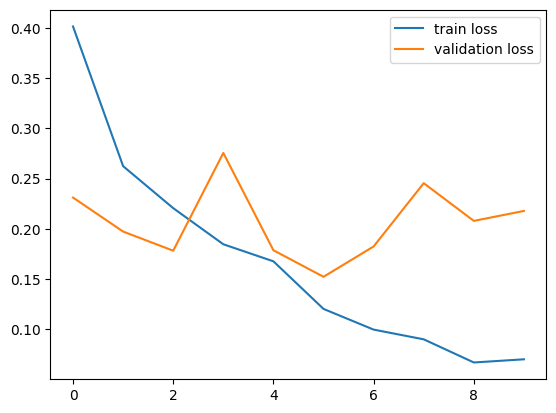

In [17]:
h = Model

plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

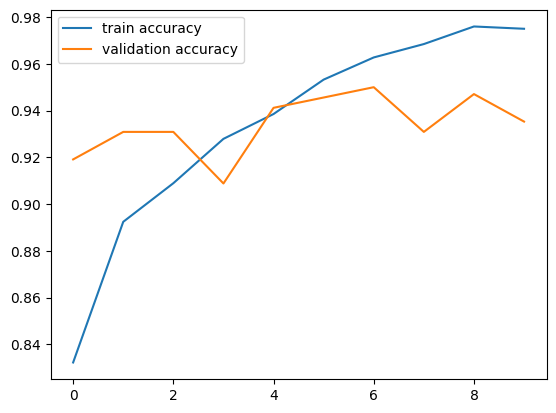

In [18]:
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()